In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [2]:
raw_csv_data=pd.read_csv(r'C:\Users\admin\Desktop\Index2018.csv')
df_comp=raw_csv_data.copy()
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index('date',inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx'],df_comp['dax'],df_comp['nikkei'],df_comp['ftse']

In [5]:
size=int(len(df_comp)*0.8)
df=df_comp.iloc[:size]
df_test=df_comp.iloc[size:]

# The ACF

Text(0.5, 1.0, 'ACF For Prices')

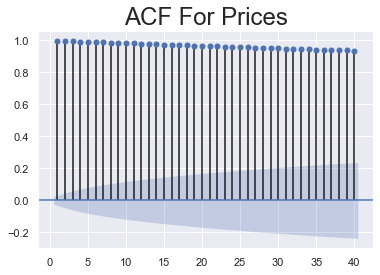

In [6]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title('ACF For Prices',size=24)

# The PACF

Text(0.5, 1.0, 'PACF For Prices')

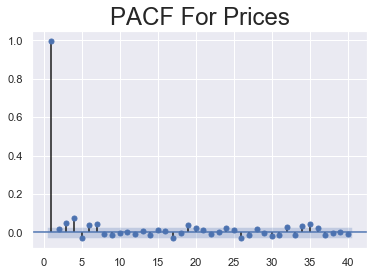

In [7]:
sgt.plot_pacf(df.market_value,lags=40,alpha=0.05,zero=False,method=('ols'))
plt.title('PACF For Prices',size=24)

# The AR(1) Model

In [8]:
model_ar=ARMA(df.market_value,order=[1,0])

In [9]:
results_ar=model_ar.fit()

In [10]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Tue, 30 Mar 2021   AIC                          55251.195
Time:                        12:37:00   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

# Higher Lag AR Models

In [11]:
model_ar_2=ARMA(df.market_value,order=[2,0])
results_ar_2=model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Tue, 30 Mar 2021   AIC                          55251.742
Time:                        12:37:00   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.684     10.268      0.000    4118.119    6061.164
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4633           +0.0000j           58.4633            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
model_ar_3=ARMA(df.market_value,order=[3,0])
results_ar_3=model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.104
Method:                       css-mle   S.D. of innovations             59.180
Date:                Tue, 30 Mar 2021   AIC                          55242.208
Time:                        12:37:01   BIC                          55274.814
Sample:                    01-07-1994   HQIC                         55253.633
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5408.7906    725.933      7.451      0.000    3985.989    6831.592
ar.L1.market_value     0.9806      0.014     69.647      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0490      0.014      3.471      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1855           -4.5129j            4.5167           -0.2565
AR.3           -0.1855           +4.5129j            4.5167            0.2565
-----------------------------------------------------------------------------
"""

In [13]:
model_ar_4=ARMA(df.market_value,order=[4,0])
results_ar_4=model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Tue, 30 Mar 2021   AIC                          55217.130
Time:                        12:37:03   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    559.981      9.089      0.000    3992.098    6187.185
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

# LLR  Test

In [14]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Comparing Higher-Lag LR Models

In [15]:
LLR_test(model_ar_2,model_ar_3)

0.001

In [16]:
LLR_test(model_ar_3,model_ar_4)

0.0

In [17]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Tue, 30 Mar 2021   AIC                          55217.130
Time:                        12:37:07   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    559.981      9.089      0.000    3992.098    6187.185
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [18]:
model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Tue, 30 Mar 2021   AIC                          55214.697
Time:                        12:37:11   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    543.595      9.363      0.000    4024.214    6155.068
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [19]:
model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Tue, 30 Mar 2021   AIC                          55208.947
Time:                        12:37:17   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    565.261      9.004      0.000    3981.750    6197.533
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [20]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27592.080
Method:                       css-mle   S.D. of innovations             58.898
Date:                Tue, 30 Mar 2021   AIC                          55202.160
Time:                        12:37:28   BIC                          55260.852
Sample:                    01-07-1994   HQIC                         55222.726
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5397.4887    803.007      6.722      0.000    3823.624    6971.353
ar.L1.market_value     0.9787      0.014     69.578      0.000       0.951       1.006
ar.L2.market_value  

In [21]:
model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Tue, 30 Mar 2021   AIC                          55203.478
Time:                        12:37:39   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    584.999      8.700      0.000    3943.064    6236.218
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [22]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


# The DF-Test

In [23]:
sts.adfuller(df.market_value)

(-1.9041551418836884,
 0.3301089327702823,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

# Using Returns

In [24]:
df['returns']=df.market_value.pct_change(1).mul(100)
df=df.iloc[1:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
sts.adfuller(df.returns)

(-12.770265719497234,
 7.79805833603833e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

# ACF And PACF For Returns

Text(0.5, 1.0, 'ACF FTSE Returns')

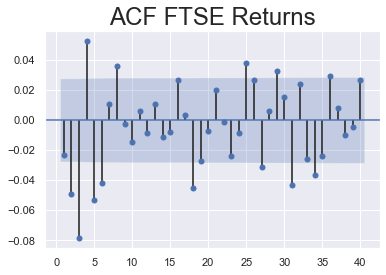

In [26]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title('ACF FTSE Returns',size=24)

Text(0.5, 1.0, 'PACF FTSE Returns')

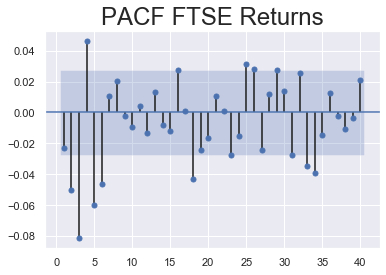

In [27]:
sgt.plot_pacf(df.returns,lags=40,zero=False,method=('ols'))
plt.title('PACF FTSE Returns',size=24)

# AR(1) For Returns

In [28]:
model_ret_ar_1=ARMA(df.returns,order=[1,0])
result_ret_ar_1=model_ret_ar_1.fit()
result_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 30 Mar 2021   AIC                          15865.497
Time:                        12:38:00   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

# Higher Lags AR Models For Returns

In [29]:
model_ret_ar_2=ARMA(df.returns,order=[2,0])
result_ret_ar_2=model_ret_ar_2.fit()
result_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 30 Mar 2021   AIC                          15854.911
Time:                        12:38:01   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [30]:
LLR_test(model_ret_ar_1,model_ret_ar_2)

0.0

In [31]:
model_ret_ar_3=ARMA(df.returns,order=[3,0])
result_ret_ar_3=model_ret_ar_3.fit()
result_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Tue, 30 Mar 2021   AIC                          15823.477
Time:                        12:38:03   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [32]:
LLR_test(model_ret_ar_2,model_ret_ar_3)

0.0

In [33]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Tue, 30 Mar 2021   AIC                          15814.661
Time:                        12:38:03   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [34]:
model_ret_ar_5 = ARMA(df.returns, order = (5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 30 Mar 2021   AIC                          15798.779
Time:                        12:38:04   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

In [35]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 30 Mar 2021   AIC                          15789.890
Time:                        12:38:06   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

In [36]:
model_ret_ar_7 = ARMA(df.returns, order = (7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 30 Mar 2021   AIC                          15791.294
Time:                        12:38:08   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [37]:
print("\nLLR test p-value = " + str(LLR_test(model_ret_ar_6, model_ret_ar_7)))


LLR test p-value = 0.44


# Normalizing Values

In [38]:
benchmark=df.market_value.iloc[0]

In [39]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [40]:
sts.adfuller(df.norm)

(-1.8928710132672324,
 0.3354222074330083,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [41]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.7702657194973,
 7.798058336035981e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

# Normalizing Returns

In [42]:
model_norm_ret_ar_1 = ARMA (df.norm_ret, order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Tue, 30 Mar 2021   AIC                          80709.487
Time:                        12:38:12   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Tue, 30 Mar 2021   AIC                          80698.901
Time:                        12:38:13   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [44]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40308.642
Method:                       css-mle   S.D. of innovations            742.977
Date:                Tue, 30 Mar 2021   AIC                          80635.283
Time:                        12:38:13   BIC                          80693.974
Sample:                    01-10-1994   HQIC                         80655.849
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.630     -1.387      0.165     -28.887       4.941
ar.L1.norm_ret    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.norm_ret    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.norm_ret     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.norm_ret    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.norm_ret     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

# Analysing the Residuals

In [45]:
df['res_price']=results_ar_7.resid

In [46]:
df.res_price.mean()

0.3500108565969332

In [47]:
df.res_price.var()

3468.2289875382457

In [48]:
sts.adfuller(df.res_price)

(-70.81855573339031,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.590960824)

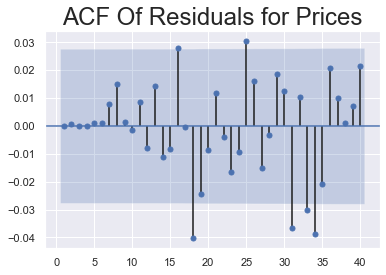

In [49]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

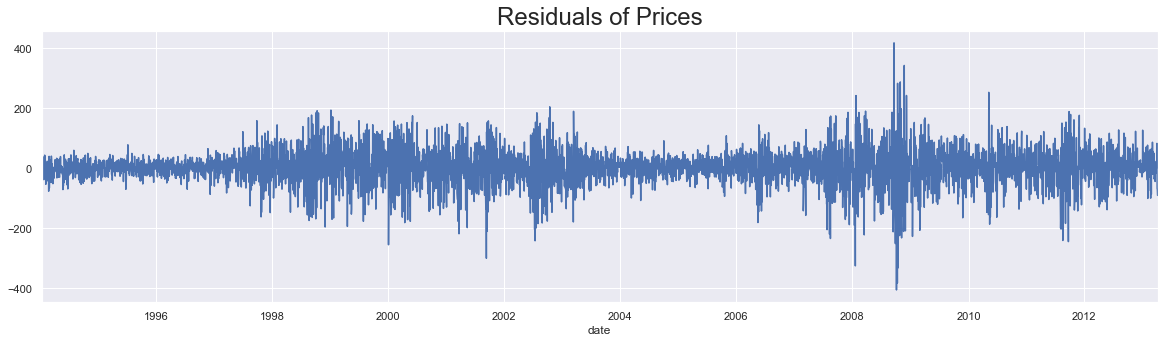

In [50]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()

# Analyzing the Residuals

In [51]:
df['res_ret'] = results_ret_ar_6.resid

In [52]:
df.res_ret.mean()

-5.3730302400295284e-05

In [53]:
df.res_ret.var()

1.3559802110752588

In [54]:
sts.adfuller(df.res_ret)

(-70.78379724311958,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834234799)

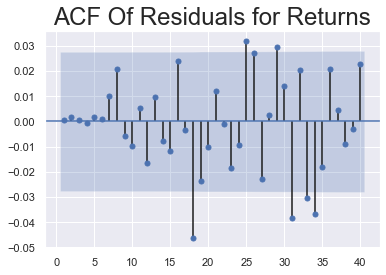

In [55]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

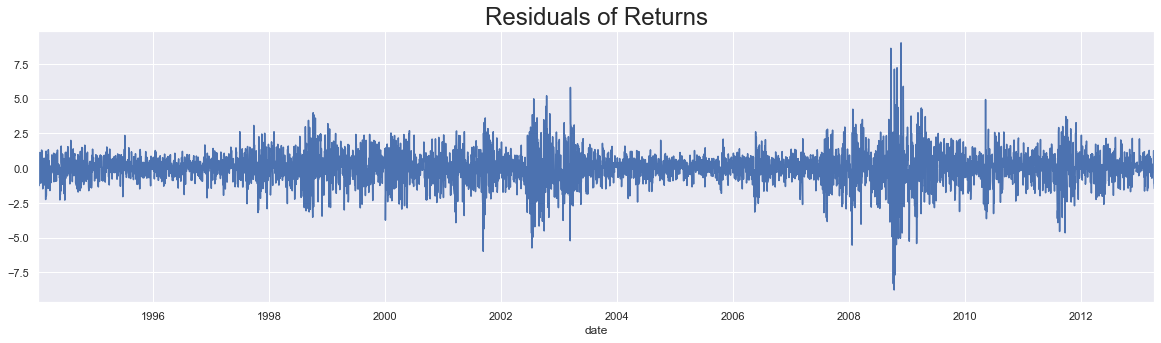

In [56]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

# ARMA(1,1)

In [57]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood               -7915.406
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 30 Mar 2021   AIC                          15838.812
Time:                        12:38:21   BIC                          15864.896
Sample:                    01-11-1994   HQIC                         15847.952
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.448      0.148      -0.007       0.045
ar.L1.returns     0.7647      0.067     11.338      0.000       0.633       0.897
ma.L1.returns    -0.8139      0.061    -13.393      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3077           +0.0000j            1.3077            0.0000
MA.1            1.2286           +0.0000j            1.2286            0.0000
-----------------------------------------------------------------------------
"""

In [58]:
model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))

In [59]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))


ARMA vs AR  0.0

ARMA vs MA  0.0


# Higher-Lag ARMA Models

In [60]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [61]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [62]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 3)   Log Likelihood               -7892.414
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 30 Mar 2021   AIC                          15800.828
Time:                        12:46:24   BIC                          15852.996
Sample:                    01-11-1994   HQIC                         15819.109
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.398      0.162      -0.008       0.046
ar.L1.returns    -0.1903      0.104     -1.828      0.068      -0.394       0.014
ar.L2.returns    -0.2944      0.087     -3.386      0.001      -0.465      -0.124
ar.L3.returns     0.4450      0.139      3.210      0.001       0.173       0.717
ma.L1.returns     0.1712      0.099      1.726      0.084      -0.023       0.366
ma.L2.returns     0.2279      0.084      2.698      0.007       0.062       0.393
ma.L3.returns    -0.5424      0.128     -4.253      0.000      -0.792      -0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5170           -1.0286j            1.1512           -0.3241
AR.2           -0.5170           +1.0286j            1.1512            0.3241
AR.3            1.6955           -0.0000j            1.6955           -0.0000
MA.1           -0.5289           -0.9838j            1.1169           -0.3285
MA.2           -0.5289           +0.9838j            1.1169            0.3285
MA.3            1.4779           -0.0000j            1.4779           -0.0000
-----------------------------------------------------------------------------
"""

In [63]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 2)   Log Likelihood               -7894.627
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 30 Mar 2021   AIC                          15803.254
Time:                        12:47:20   BIC                          15848.901
Sample:                    01-11-1994   HQIC                         15819.250
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.255      0.209      -0.011       0.048
ar.L1.returns    -0.6786      0.087     -7.800      0.000      -0.849      -0.508
ar.L2.returns    -0.5084      0.139     -3.669      0.000      -0.780      -0.237
ar.L3.returns    -0.1142      0.015     -7.661      0.000      -0.143      -0.085
ma.L1.returns     0.6569      0.087      7.538      0.000       0.486       0.828
ma.L2.returns     0.4469      0.141      3.174      0.002       0.171       0.723
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5110j            1.5893           -0.3002
AR.2           -0.4929           +1.5110j            1.5893            0.3002
AR.3           -3.4680           -0.0000j            3.4680           -0.5000
MA.1           -0.7349           -1.3028j            1.4958           -0.3317
MA.2           -0.7349           +1.3028j            1.4958            0.3317
-----------------------------------------------------------------------------
"""

In [65]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 3)   Log Likelihood               -7894.467
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 30 Mar 2021   AIC                          15802.934
Time:                        12:48:24   BIC                          15848.581
Sample:                    01-11-1994   HQIC                         15818.930
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.280      0.200      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.247      0.000      -0.736      -0.385
ar.L2.returns    -0.4179      0.193     -2.163      0.031      -0.797      -0.039
ma.L1.returns     0.5378      0.090      6.002      0.000       0.362       0.713
ma.L2.returns     0.3531      0.195      1.809      0.070      -0.029       0.736
ma.L3.returns    -0.1159      0.016     -7.374      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6706           -1.3939j            1.5469           -0.3214
AR.2           -0.6706           +1.3939j            1.5469            0.3214
MA.1           -0.7280           -1.1773j            1.3842           -0.3381
MA.2           -0.7280           +1.1773j            1.3842            0.3381
MA.3            4.5016           -0.0000j            4.5016           -0.0000
-----------------------------------------------------------------------------
"""

In [66]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.043

In [67]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 1)   Log Likelihood               -7897.956
Method:                       css-mle   S.D. of innovations              1.167
Date:                Tue, 30 Mar 2021   AIC                          15807.913
Time:                        12:49:18   BIC                          15847.039
Sample:                    01-11-1994   HQIC                         15821.623
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.302      0.193      -0.010       0.047
ar.L1.returns    -0.5078      0.088     -5.773      0.000      -0.680      -0.335
ar.L2.returns    -0.0639      0.016     -4.027      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.853      0.000      -0.138      -0.083
ma.L1.returns     0.4839      0.088      5.504      0.000       0.312       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5093           -0.0000j            1.5093           -0.5000
AR.2            0.4650           -2.4070j            2.4515           -0.2196
AR.3            0.4650           +2.4070j            2.4515            0.2196
MA.1           -2.0665           +0.0000j            2.0665            0.5000
-----------------------------------------------------------------------------
"""

In [68]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)


0.01

In [69]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 2)   Log Likelihood               -7912.126
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 30 Mar 2021   AIC                          15836.252
Time:                        12:53:18   BIC                          15875.378
Sample:                    01-11-1994   HQIC                         15849.963
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.396      0.163      -0.008       0.046
ar.L1.returns     0.7815      0.238      3.285      0.001       0.315       1.248
ar.L2.returns    -0.1562      0.176     -0.885      0.376      -0.502       0.190
ma.L1.returns    -0.8100      0.239     -3.390      0.001      -1.278      -0.342
ma.L2.returns     0.1176      0.187      0.628      0.530      -0.249       0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5011           -0.3814j            2.5300           -0.0241
AR.2            2.5011           +0.3814j            2.5300            0.0241
MA.1            1.6119           +0.0000j            1.6119            0.0000
MA.2            5.2745           +0.0000j            5.2745            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 3)   Log Likelihood               -7895.722
Method:                       css-mle   S.D. of innovations              1.167
Date:                Tue, 30 Mar 2021   AIC                          15803.445
Time:                        12:53:55   BIC                          15842.571
Sample:                    01-11-1994   HQIC                         15817.155
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.336      0.181      -0.009       0.047
ar.L1.returns    -0.4700      0.096     -4.906      0.000      -0.658      -0.282
ma.L1.returns     0.4475      0.095      4.696      0.000       0.261       0.634
ma.L2.returns    -0.0638      0.015     -4.117      0.000      -0.094      -0.033
ma.L3.returns    -0.1183      0.014     -8.203      0.000      -0.147      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1276           +0.0000j            2.1276            0.5000
MA.1           -1.4881           -1.1203j            1.8626           -0.3973
MA.2           -1.4881           +1.1203j            1.8626            0.3973
MA.3            2.4371           -0.0000j            2.4371           -0.0000
-----------------------------------------------------------------------------
"""

In [71]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7894.627078611517 	AIC =  15803.254157223035

 ARMA(1,3): 	LL =  -7895.722431576331 	AIC =  15803.444863152661


# Residuals for Returns


In [72]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

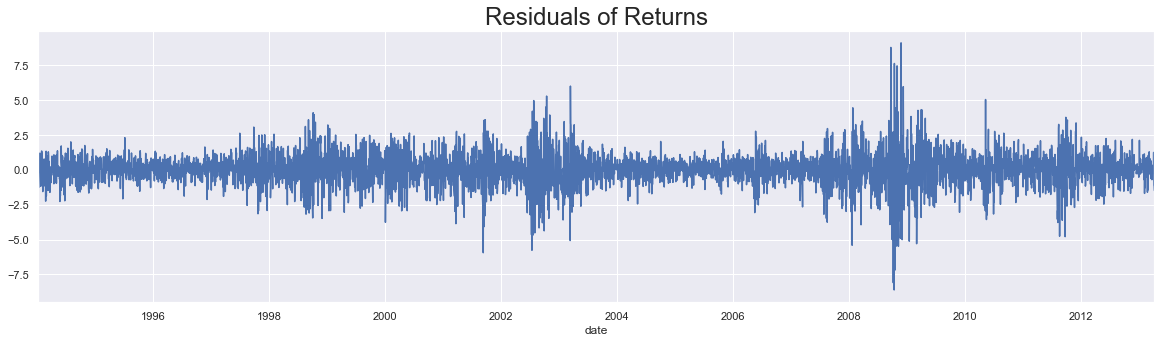

In [73]:
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

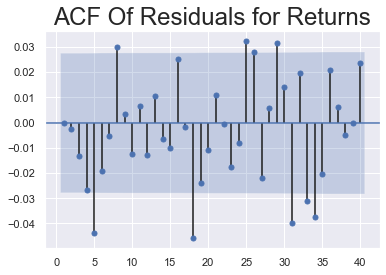

In [74]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

# Reevaluating Model Selection

In [75]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(5, 5)   Log Likelihood               -7881.065
Method:                       css-mle   S.D. of innovations              1.163
Date:                Tue, 30 Mar 2021   AIC                          15786.131
Time:                        12:56:38   BIC                          15864.382
Sample:                    01-11-1994   HQIC                         15813.551
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.405      0.160      -0.007       0.045
ar.L1.returns    -0.0687      0.140     -0.492      0.623      -0.343       0.205
ar.L2.returns    -0.6723      0.146     -4.604      0.000      -0.958      -0.386
ar.L3.returns    -0.1155      0.141     -0.819      0.413      -0.392       0.161
ar.L4.returns     0.1775      0.129      1.378      0.168      -0.075       0.430
ar.L5.returns     0.1214      0.107      1.131      0.258      -0.089       0.332
ma.L1.returns     0.0446      0.138      0.324      0.746      -0.225       0.315
ma.L2.returns     0.6224      0.144      4.322      0.000       0.340       0.905
ma.L3.returns     0.0109      0.136      0.080      0.936      -0.256       0.278
ma.L4.returns    -0.1749      0.122     -1.433      0.152      -0.414       0.064
ma.L5.returns    -0.2239      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0871           -1.0365j            1.0402           -0.2367
AR.2            0.0871           +1.0365j            1.0402            0.2367
AR.3            1.7727           -0.0000j            1.7727           -0.0000
AR.4           -1.7046           -1.1787j            2.0724           -0.4037
AR.5           -1.7046           +1.1787j            2.0724            0.4037
MA.1            0.1034           -1.0436j            1.0487           -0.2343
MA.2            0.1034           +1.0436j            1.0487            0.2343
MA.3            1.4862           -0.0000j            1.4862           -0.0000
MA.4           -1.2370           -1.0965j            1.6530           -0.3846
MA.5           -1.2370           +1.0965j            1.6530            0.3846
-----------------------------------------------------------------------------
"""

In [76]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(5, 1)   Log Likelihood               -7888.206
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 30 Mar 2021   AIC                          15792.412
Time:                        12:57:01   BIC                          15844.580
Sample:                    01-11-1994   HQIC                         15810.692
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.411      0.158      -0.007       0.045
ar.L1.returns     0.3437      0.131      2.619      0.009       0.087       0.601
ar.L2.returns    -0.0459      0.015     -3.008      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.069      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.686      0.000      -0.109      -0.053
ma.L1.returns    -0.3670      0.131     -2.796      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6157           -0.0000j            1.6157           -0.5000
AR.2            1.3795           -0.8617j            1.6265           -0.0889
AR.3            1.3795           +0.8617j            1.6265            0.0889
AR.4           -0.1156           -1.6927j            1.6967           -0.2608
AR.5           -0.1156           +1.6927j            1.6967            0.2608
MA.1            2.7250           +0.0000j            2.7250            0.0000
-----------------------------------------------------------------------------
"""

In [77]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 5)   Log Likelihood               -7889.867
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 30 Mar 2021   AIC                          15795.733
Time:                        12:57:31   BIC                          15847.901
Sample:                    01-11-1994   HQIC                         15814.014
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.422      0.155      -0.007       0.045
ar.L1.returns     0.3281      0.152      2.155      0.031       0.030       0.627
ma.L1.returns    -0.3531      0.152     -2.329      0.020      -0.650      -0.056
ma.L2.returns    -0.0405      0.015     -2.627      0.009      -0.071      -0.010
ma.L3.returns    -0.0679      0.017     -4.022      0.000      -0.101      -0.035
ma.L4.returns     0.0743      0.020      3.772      0.000       0.036       0.113
ma.L5.returns    -0.0683      0.015     -4.657      0.000      -0.097      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0475           +0.0000j            3.0475            0.0000
MA.1           -1.1896           -1.1547j            1.6578           -0.3774
MA.2           -1.1896           +1.1547j            1.6578            0.3774
MA.3            1.5045           -0.0000j            1.5045           -0.0000
MA.4            0.9810           -1.6058j            1.8817           -0.1627
MA.5            0.9810           +1.6058j            1.8817            0.1627
-----------------------------------------------------------------------------
"""

In [78]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ",results_ret_ar_1_ma_5.llf,"\t AIC = ",results_ret_ar_1_ma_5.aic)

ARMA(5,1):  	 LL =  -7888.2059774247255 	 AIC =  15792.411954849451
ARMA(1,5):  	 LL =  -7889.866737335683 	 AIC =  15795.733474671366


In [79]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)

ARMA(3,2):  	 LL =  -7894.627078611517 	 AIC =  15803.254157223035


# Residuals for the New Model

In [80]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

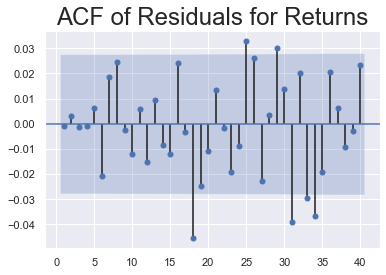

In [81]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

# ARMA Models for Prices

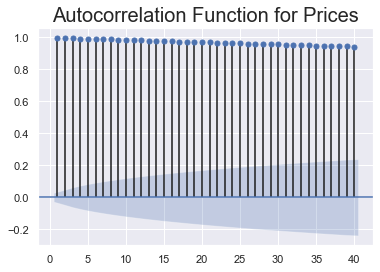

In [82]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

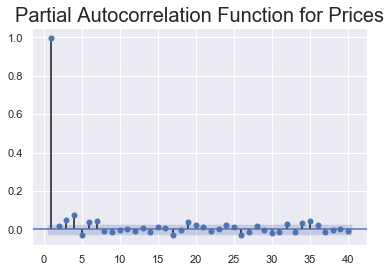

In [83]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [84]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27616.782
Method:                       css-mle   S.D. of innovations             59.254
Date:                Tue, 30 Mar 2021   AIC                          55241.565
Time:                        13:00:57   BIC                          55267.649
Sample:                    01-10-1994   HQIC                         55250.705
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5057.3528    496.068     10.195      0.000    4085.077    6029.628
ar.L1.market_value     0.9985      0.001   1325.161      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.4991           +0.0000j           52.4991            0.0000
-----------------------------------------------------------------------------
"""

In [85]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

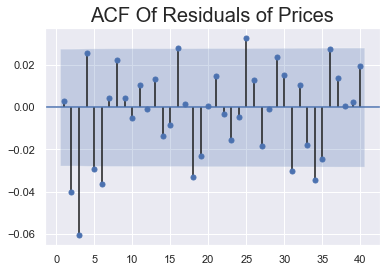

In [86]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [87]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 6)   Log Likelihood              -27582.934
Method:                       css-mle   S.D. of innovations             58.855
Date:                Tue, 30 Mar 2021   AIC                          55193.867
Time:                        13:05:03   BIC                          55285.164
Sample:                    01-10-1994   HQIC                         55225.859
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9714    569.248      8.942      0.000    3974.265    6205.677
ar.L1.market_value     1.9273      0.032     60.270      0.000       1.865       1.990
ar.L2.market_value    -1.7358      0.040    -43.616      0.000      -1.814      -1.658
ar.L3.market_value     1.2681      0.034     37.025      0.000       1.201       1.335
ar.L4.market_value    -0.2379      0.158     -1.506      0.132      -0.547       0.072
ar.L5.market_value    -0.4054      0.165     -2.454      0.014      -0.729      -0.082
ar.L6.market_value     0.1833      0.049      3.767      0.000       0.088       0.279
ma.L1.market_value    -0.9484      0.035    -27.166      0.000      -1.017      -0.880
ma.L2.market_value     0.7800      0.032     24.265      0.000       0.717       0.843
ma.L3.market_value    -0.5088      0.031    -16.388      0.000      -0.570      -0.448
ma.L4.market_value    -0.1560      0.159     -0.983      0.326      -0.467       0.155
ma.L5.market_value     0.0945      0.057      1.672      0.095      -0.016       0.205
ma.L6.market_value     0.0671      0.024      2.808      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0277           -0.0000j            2.0277           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5335           -0.2627j            1.5558           -0.0270
AR.6            1.5335           +0.2627j            1.5558            0.0270
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3635           -0.2780j            1.3915           -0.0320
MA.4            1.3635           +0.2780j            1.3915            0.0320
MA.5           -2.1713           -1.4356j            2.6030           -0.4070
MA.6           -2.1713           +1.4356j            2.6030            0.4070
-----------------------------------------------------------------------------
"""

In [88]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags = 7)
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(5, 6)   Log Likelihood              -27582.864
Method:                       css-mle   S.D. of innovations             58.854
Date:                Tue, 30 Mar 2021   AIC                          55191.728
Time:                        13:06:04   BIC                          55276.504
Sample:                    01-10-1994   HQIC                         55221.435
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9785    581.521      8.753      0.000    3950.218    6229.739
ar.L1.market_value     1.3590      0.177      7.679      0.000       1.012       1.706
ar.L2.market_value    -1.1296      0.237     -4.775      0.000      -1.593      -0.666
ar.L3.market_value     0.9153      0.228      4.012      0.000       0.468       1.362
ar.L4.market_value     0.0154      0.203      0.076      0.940      -0.383       0.414
ar.L5.market_value    -0.1612      0.119     -1.352      0.176      -0.395       0.072
ma.L1.market_value    -0.3801      0.177     -2.142      0.032      -0.728      -0.032
ma.L2.market_value     0.7295      0.125      5.836      0.000       0.484       0.974
ma.L3.market_value    -0.2202      0.152     -1.445      0.149      -0.519       0.079
ma.L4.market_value    -0.1386      0.114     -1.215      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.324      0.000      -0.120      -0.056
ma.L6.market_value     0.0266      0.023      1.133      0.257      -0.019       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0459           -0.2360
AR.2            0.0917           +1.0418j            1.0459            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8970           -0.0000j            1.8970           -0.0000
AR.5           -2.9862           -0.0000j            2.9862           -0.5000
MA.1            0.1071           -1.0488j            1.0542           -0.2338
MA.2            0.1071           +1.0488j            1.0542            0.2338
MA.3           -1.5347           -1.5157j            2.1570           -0.3760
MA.4           -1.5347           +1.5157j            2.1570            0.3760
MA.5            1.5916           -0.0000j            1.5916           -0.0000
MA.6            4.5694           -0.0000j            4.5694           -0.0000
-----------------------------------------------------------------------------
"""

In [89]:
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags = 7)
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 1)   Log Likelihood              -27589.192
Method:                       css-mle   S.D. of innovations             58.929
Date:                Tue, 30 Mar 2021   AIC                          55196.385
Time:                        13:07:05   BIC                          55255.076
Sample:                    01-10-1994   HQIC                         55216.951
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.9690    587.463      8.664      0.000    3938.563    6241.375
ar.L1.market_value     1.3920      0.058     23.986      0.000       1.278       1.506
ar.L2.market_value    -0.4368      0.059     -7.415      0.000      -0.552      -0.321
ar.L3.market_value    -0.0101      0.025     -0.408      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.066      0.000       0.030       0.085
ma.L1.market_value    -0.4126      0.059     -6.939      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7607           -0.0000j            1.7607           -0.5000
AR.3           -0.0803           -1.8406j            1.8424           -0.2569
AR.4           -0.0803           +1.8406j            1.8424            0.2569
AR.5            1.4694           -0.8692j            1.7073           -0.0850
AR.6            1.4694           +0.8692j            1.7073            0.0850
MA.1            2.4239           +0.0000j            2.4239            0.0000
-----------------------------------------------------------------------------
"""

In [90]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)

ARMA(5,6):  	 LL =  -27582.864216650698 	 AIC =  55191.728433301396
ARMA(6,1):  	 LL =  -27589.192477549368 	 AIC =  55196.384955098736


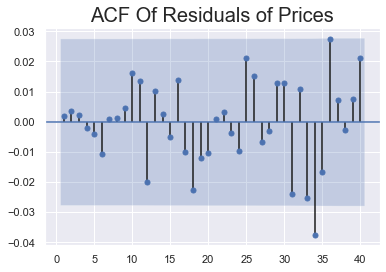

In [91]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [92]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)

ARMA(5,6):  	 LL =  -27582.864216650698 	 AIC =  55191.728433301396
ARMA(5,1):  	 LL =  -7888.2059774247255 	 AIC =  15792.411954849451
